### Franck-Hertz Lab - Data & Results

This notebook includes all data processing, graphs, and final calculations for the Franck-Hertz Lab. 

#### Part 0 - Useful Libraries and Functions

This section contains libraries and functions that coud potentially be used later.

In [36]:
import matplotlib.pyplot as plt #useful libraries
import math
from uncertainties import ufloat, umath, unumpy
import numpy as np
import pandas as pd


#Useful Physical Constants
e_mass = ufloat(9.1093837, 0.00000005)*(10**(-31))
e_charge = ufloat(1.60217663, 0.000000005)*(10**(-19)) #mass and charge of electron
mu_0 = 4*(math.pi)*(10**(-7)) #magnetic constant

#Experimental Constants
coil_number = 320 
coil_radius = ufloat(0.147, 0.002)/2


In [37]:
def compute_line_fit(xs, ys): #Function to compute line fit
    xs, xerror = np.array([x.n for x in xs]), np.array([x.s for x in xs])
    ys, yerror = np.array([x.n for x in ys]), np.array([x.s for x in ys])
    
    N = len(xs)
    b = (np.sum(xs**2) * np.sum(ys) - np.sum(xs) * np.sum(xs * ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    m = (N * np.sum(xs * ys) - np.sum(xs) * np.sum(ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    delta = np.sum(1/(yerror**2)) * np.sum(xs**2 / yerror**2) - (np.sum(xs / yerror**2))**2
    db = np.sqrt(1 / delta * np.sum(xs**2 / yerror**2))
    dm = np.sqrt(1 / delta * np.sum(1 / yerror**2))
    return ufloat(m, dm), ufloat(b, db)

def reduced_chi_squared(xs, ys, m, b): #Function to compute reduced chi squared value

    xs, xerror = np.array([x.n for x in xs]), np.array([x.s for x in xs])
    ys, yerror = np.array([x.n for x in ys]), np.array([x.s for x in ys])
    
    chi_sq = sum(((ys - m * xs - b) ** 2) / (yerror ** 2))
    reduced_chi_sq =  chi_sq/(len(ys) - 2)
    
    return reduced_chi_sq

def graph_data_with_linear_fit(xs, ys, title, x_label, y_label, measurements_label, linear_fit_label):
    xs_abs, xs_error = np.array([x.n for x in xs]), np.array([x.s for x in xs])
    ys_abs, ys_error = np.array([x.n for x in ys]), np.array([x.s for x in ys])

    #computes line fit and reduced chi squared values
    line_fit_slope, line_fit_y_intercept = compute_line_fit(xs, ys)
    
    reduced_chi_squared_val = reduced_chi_squared(xs, ys, line_fit_slope, 
    line_fit_y_intercept)
        
    #plots x and y data points, and the linear fit
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]})
    ax1.errorbar(xs_abs, ys_abs, xerr= xs_error, yerr= ys_error, fmt=".", label=measurements_label, color="blue")
    ax1.plot(xs_abs, line_fit_slope.n * xs_abs + line_fit_y_intercept.n, label= linear_fit_label[0] + str(line_fit_slope) + linear_fit_label[1] + 
    " (" + str(line_fit_y_intercept) + ") ", color="black")
    
    ax1.legend(loc='best', prop={'size': 7})
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.set_title(title)

    #residual plot
    ax2.errorbar(xs_abs, ys_abs - (line_fit_slope.n * xs_abs + line_fit_y_intercept.n),
                yerr=ys_error, xerr=xs_error, fmt=".",
                color="blue")
    ax2.axhline(y=0, color="black")
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.set_title("Residuals")

    fig.tight_layout()
    plt.show()
    
    return line_fit_slope, line_fit_y_intercept, reduced_chi_squared_val

def add(a,b):
    return ufloat(a.n + b.n, a.s + b.s)

def add_arr(arr,b):
    return unumpy.uarray([(arr[i].n + b.n) for i in range(0, len(arr))], [(arr[i].s + b.s) for i in range(0, len(arr))])

def sub(a,b):
    return ufloat(a.n - b.n, a.s + b.s)

def sub_arr(arr,b):
    return unumpy.uarray([(arr[i].n - b.n) for i in range(0, len(arr))], [(arr[i].s + b.s) for i in range(0, len(arr))])
    

#### Part 1 - Data Formatting

This section includes the data collected for each of the three RF probes during during the experiment.

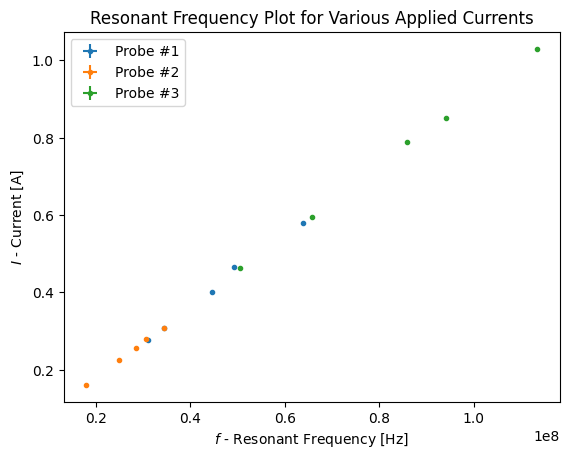

In [38]:
probe_1_frequencies = sorted((unumpy.uarray([34.474, 31.116, 49.309, 44.607, 63.939], ([0.0005]*5)))*(10**6))
probe_1_currents = sorted(unumpy.uarray([0.435, 0.393, 0.660, 0.569, 0.820], [0.0005]*5)/math.sqrt(2))

probe_2_frequencies = sorted((unumpy.uarray([28.524, 24.854, 34.401, 17.998, 30.649], ([0.0005]*5)))*(10**6))
probe_2_currents = sorted(unumpy.uarray([0.363, 0.320, 0.435, 0.228, 0.397], [0.0005]*5)/math.sqrt(2))

probe_3_frequencies = sorted((unumpy.uarray([85.830, 50.643, 65.866, 94.170, 113.363], ([0.0005]*5)))*(10**6))
probe_3_currents = sorted(unumpy.uarray([1.115, 0.654, 0.841, 1.203, 1.456], [0.0005]*5)/math.sqrt(2))

probe_frequencies = sorted(np.concatenate((probe_1_frequencies, probe_2_frequencies, probe_3_frequencies)))
probe_currents = sorted(np.concatenate((probe_1_currents, probe_2_currents, probe_3_currents)))

plt.figure(figsize=(6.4,4.8))
plt.errorbar([x.n for x in (probe_1_frequencies)], [x.n for x in probe_1_currents], xerr = [x.s for x in (probe_1_frequencies)],
             yerr = [x.s for x in (probe_1_currents)], label="Probe #1", fmt = '.')
plt.errorbar([x.n for x in (probe_2_frequencies)], [x.n for x in probe_2_currents], xerr = [x.s for x in (probe_2_frequencies)],
             yerr = [x.s for x in (probe_2_currents)], label="Probe #2", fmt = '.')
plt.errorbar([x.n for x in (probe_3_frequencies)], [x.n for x in probe_3_currents], xerr = [x.s for x in (probe_3_frequencies)],
             yerr = [x.s for x in (probe_3_currents)], label="Probe #3", fmt = '.')


plt.ylabel("$I$ - Current [A]")
plt.xlabel("$f$ - Resonant Frequency [Hz]")
plt.title("Resonant Frequency Plot for Various Applied Currents")
plt.legend(loc='best', prop={'size': 10})
plt.show()

The data appears to display a linear relationship between current and resonant frequency. Applying a linear fit to this data produces the following graph.

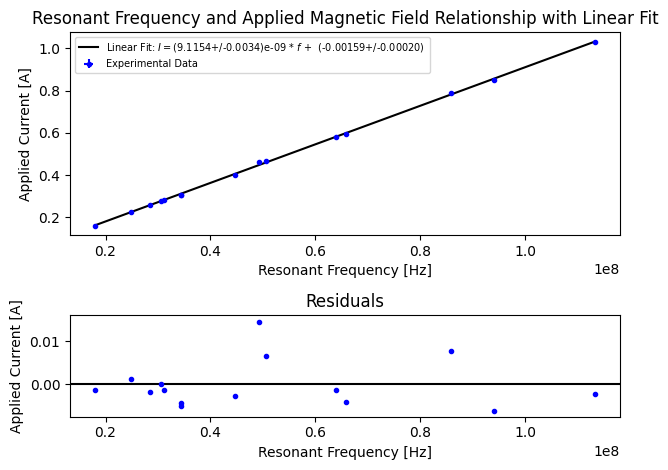

Linear Fit Slope:  (9.1154+/-0.0034)e-09
Linear Fit Y-Intercept:  -0.00159+/-0.00020
Reduced Chi-Squared Value:  268.7963250442454+/-0.0000000000031


In [39]:
line_fit_slope, line_fit_y_intercept, reduced_chi_squared_val = graph_data_with_linear_fit(probe_frequencies, probe_currents, "Resonant Frequency and Applied Magnetic Field Relationship with Linear Fit", "Resonant Frequency [Hz]", "Applied Current [A]", "Experimental Data", ["Linear Fit: $I = $", " * $f$ + "])
print("Linear Fit Slope: ", line_fit_slope)
print("Linear Fit Y-Intercept: ", line_fit_y_intercept)
print("Reduced Chi-Squared Value: ", reduced_chi_squared_val)

#### Part 2 - Finding the Relationship Between Frequency and Applied Field

The relationship between the current through the coils and the resulting magnetic field is given by the following relation:

#### $B = (\frac{4}{5})^{1.5} \frac{\mu_{0}nI}{R}$

Where $\mu_{0}$ is the magnetic constant, n is the number of coils, R is the coil radius, and I is the applied current. Substituting these values in, we can get the applied magnetic field for each of the measured applied currents. 

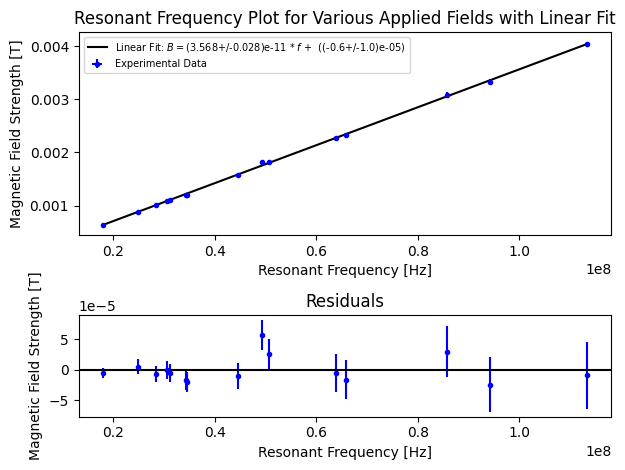

Linear Fit Slope:  (3.568+/-0.028)e-11
Linear Fit Y-Intercept:  (-0.6+/-1.0)e-05
Reduced Chi-Squared Value:  0.86+/-0.23


In [40]:
field_values = unumpy.uarray([x.n for x in probe_currents], [x.s for x in probe_currents]) * (mu_0 * coil_number * ((0.8)**(1.5)))/coil_radius

line_fit_slope, line_fit_y_intercept, reduced_chi_squared_val = graph_data_with_linear_fit(probe_frequencies, field_values, "Resonant Frequency Plot for Various Applied Fields with Linear Fit", "Resonant Frequency [Hz]", "Magnetic Field Strength [T]", "Experimental Data", ["Linear Fit: $B = $", " * $f$ + "])
print("Linear Fit Slope: ", line_fit_slope)
print("Linear Fit Y-Intercept: ", line_fit_y_intercept)
print("Reduced Chi-Squared Value: ", reduced_chi_squared_val)

#### Part 3 - Gyromagnetic Ratio and G-Factor Calculation

It is known from the lab manual that the following equation should hold:

### $\nu = \frac{1}{2\pi} \gamma B_{z}$

where $\nu$ is the resonant frequency, $\gamma$ is the gyromagnetic ratio, and $B_{z}$ is the magnetic field generated by the coils (specifically the z-component of the field). This equation can be rearranged into the form,

### $B_{z} = \frac{2\pi}{\gamma} \nu$

This is the form of the linear fit above, which plot $B_{z}$ as a function of $\nu$. As a result, the slope of the linear fit, $m$, should be equivalent to $\frac{2\pi}{\gamma}$, meaning $\gamma = \frac{2\pi}{m}$.

In [41]:
gyromagnetic_ratio = (2*math.pi)/line_fit_slope
print(gyromagnetic_ratio)

(1.761+/-0.014)e+11


The Lande g-factor is given by 

### $g = \frac{\gamma}{\frac{e}{m_{e}}}$.

In [42]:
lande_g_factor = gyromagnetic_ratio/(e_charge/(2*e_mass))
print(lande_g_factor)

2.002+/-0.016
